In [1]:
from plotnine import ggplot, aes, labels, scales
from plotnine.geoms import geom_bar, geom_tile, geom_point
from itables import init_notebook_mode
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [4]:
# Create list of colors to be used in plots

colors = ['#003f5c', '#374c80', '#7a5195', '#bc5090', '#ef5675', '#ff764a', '#ffa600']

## Load Data

Load data into DataFrames. Create columns for each element of the Date/Time information.

In [5]:
# Load data into DataFrames and then concatenate DFs into one

apr_data = pd.read_csv('data/uber-raw-data-apr14.csv')
may_data = pd.read_csv('data/uber-raw-data-may14.csv')
jun_data = pd.read_csv('data/uber-raw-data-jun14.csv')
jul_data = pd.read_csv('data/uber-raw-data-jul14.csv')
aug_data = pd.read_csv('data/uber-raw-data-aug14.csv')
sep_data = pd.read_csv('data/uber-raw-data-sep14.csv')
jun_data.head()

Date/Time,Lat,Lon,Base


In [6]:
jun_data.shape

(663844, 4)

In [7]:
data = pd.concat([apr_data, may_data, jun_data, jul_data, aug_data, sep_data])
data.shape

(4534327, 4)

In [8]:
# Convert date/time info into datetime dtype

data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%m/%d/%Y %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 173.0+ MB


In [9]:
# Create time column

def get_time(date_time):
    return date_time.strftime('%H:%M:%S')

data['Time'] = data['Date/Time'].map(get_time)
data.head()

,Date/Time,Lat,Lon,Base,Time


In [10]:
data['Time'] = pd.to_datetime(data.Time, format='%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Time       datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 207.6+ MB


In [11]:
# Create day, month, year, and DOW columns

data['Day'] = data['Date/Time'].dt.day
data['Month'] = data['Date/Time'].dt.month
data['Year'] = data['Date/Time'].dt.year
data['Day_of_Week'] = data['Date/Time'].dt.dayofweek
data.head()

,Date/Time,Lat,Lon,Base,Time,Day,Month,Year,Day_of_Week


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Date/Time    datetime64[ns]
 1   Lat          float64       
 2   Lon          float64       
 3   Base         object        
 4   Time         datetime64[ns]
 5   Day          int64         
 6   Month        int64         
 7   Year         int64         
 8   Day_of_Week  int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(1)
memory usage: 345.9+ MB


In [13]:
data['Day_Name'] = data['Day_of_Week'].map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'})
data['Month_Name'] = data['Month'].map({4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep'})
data.head()

,Date/Time,Lat,Lon,Base,Time,Day,Month,Year,Day_of_Week,Day_Name,Month_Name


In [14]:
# Create hour, minute, second columns

data['hour'] = data['Date/Time'].dt.hour
data['minute'] = data['Date/Time'].dt.minute
data['second'] = data['Date/Time'].dt.second
data.head()

,Date/Time,Lat,Lon,Base,Time,Day,Month,Year,Day_of_Week,Day_Name,Month_Name,hour,minute,second


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Date/Time    datetime64[ns]
 1   Lat          float64       
 2   Lon          float64       
 3   Base         object        
 4   Time         datetime64[ns]
 5   Day          int64         
 6   Month        int64         
 7   Year         int64         
 8   Day_of_Week  int64         
 9   Day_Name     object        
 10  Month_Name   object        
 11  hour         int64         
 12  minute       int64         
 13  second       int64         
dtypes: datetime64[ns](2), float64(2), int64(7), object(3)
memory usage: 518.9+ MB


In [16]:
# Check for missing values

data.isnull().sum()

,0


## Plot trips by hour of the day

In [17]:
data['trip_count'] = 1
data.head()

,Date/Time,Lat,Lon,Base,Time,Day,Month,Year,Day_of_Week,Day_Name,Month_Name,hour,minute,second,trip_count


In [18]:
hour_data = data.groupby(by='hour').sum().reset_index()
hour_data = hour_data[['hour', 'trip_count']]
hour_data

hour,trip_count


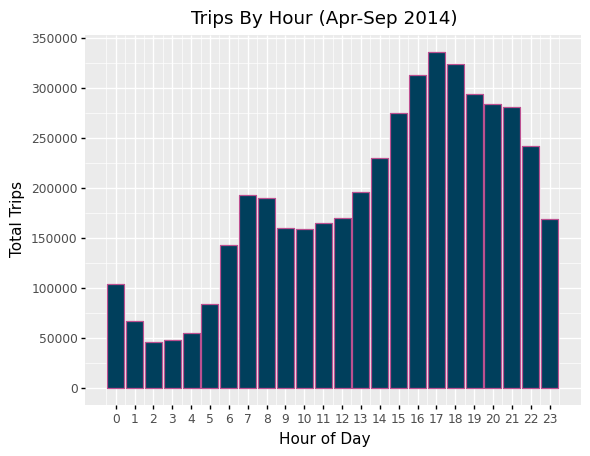

<ggplot: (-9223371902755020716)>

In [47]:
ggplot(hour_data, aes('hour', 'trip_count')) + \
geom_bar(data=hour_data, stat='identity', fill='#003f5c', color='#bc5090') + \
labels.ggtitle('Trips By Hour (Apr-Sep 2014)') + labels.xlab('Hour of Day') + labels.ylab('Total Trips') + \
scales.scale_x_continuous(breaks=range(0, 24)) + \
scales.scale_y_continuous(breaks=range(0, 400000, 50000))

In [20]:
month_hour = data.groupby(by=['Month', 'Month_Name', 'hour']).sum().reset_index()
month_hour = month_hour[['Month', 'Month_Name', 'hour', 'trip_count']]
month_hour

Month,Month_Name,hour,trip_count


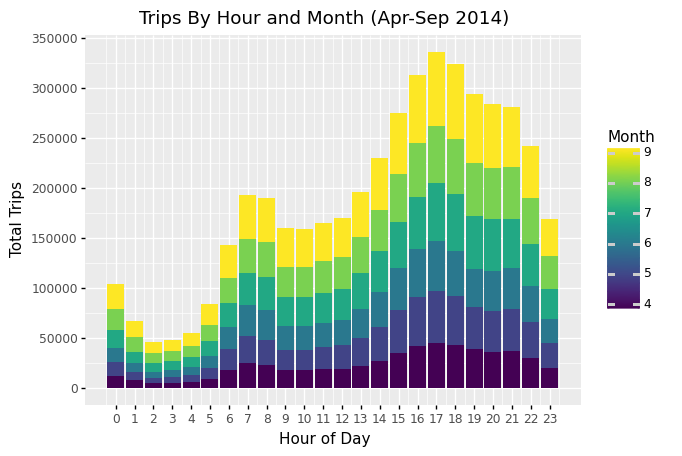

<ggplot: (-9223371902761893480)>

In [21]:
ggplot(month_hour, aes('hour', 'trip_count', fill='Month')) + \
geom_bar(stat='identity') + \
labels.ggtitle('Trips By Hour and Month (Apr-Sep 2014)') + labels.xlab('Hour of Day') + labels.ylab('Total Trips') + \
scales.scale_x_continuous(breaks=range(0, 24)) + \
scales.scale_y_continuous(breaks=range(0, 400000, 50000))

## Plot trips by day

In [22]:
# Trips by day of the month

day_data = data.groupby(by=['Day']).sum().reset_index()
day_data = day_data[['Day', 'trip_count']]
day_data

Day,trip_count


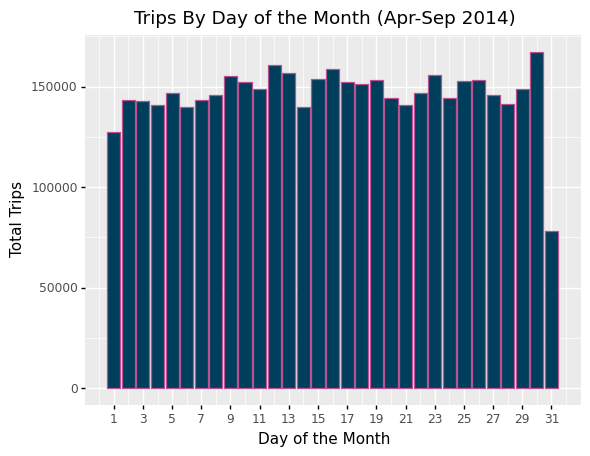

<ggplot: (-9223371902761869588)>

In [23]:
ggplot(day_data, aes('Day', 'trip_count')) + \
geom_bar(data=day_data, stat='identity', fill='#003f5c', color='#bc5090') + \
labels.ggtitle('Trips By Day of the Month (Apr-Sep 2014)') + labels.xlab('Day of the Month') + labels.ylab('Total Trips') + \
scales.scale_x_continuous(breaks=range(1, 32, 2)) + \
scales.scale_y_continuous(breaks=range(0, 200000, 50000))

In [24]:
day_month = data.groupby(by=['Month', 'Month_Name', 'Day']).sum().reset_index()
day_month = day_month[['Month', 'Month_Name', 'Day', 'trip_count']]
day_month

Month,Month_Name,Day,trip_count


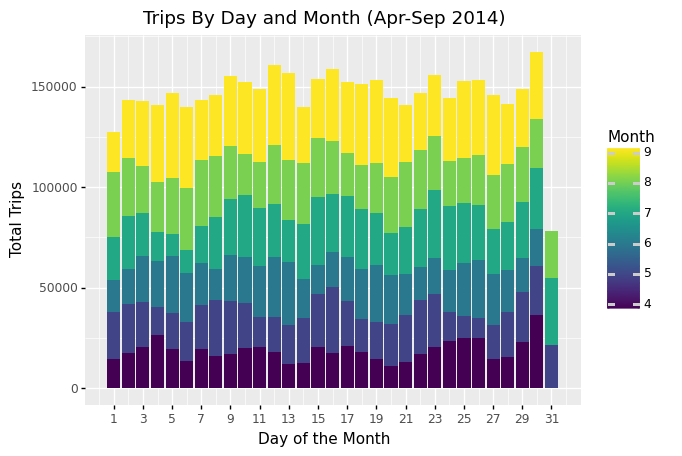

<ggplot: (-9223371902761742088)>

In [25]:
ggplot(day_month, aes('Day', 'trip_count', fill='Month')) + \
geom_bar(stat='identity') + \
labels.ggtitle('Trips By Day and Month (Apr-Sep 2014)') + labels.xlab('Day of the Month') + labels.ylab('Total Trips') + \
scales.scale_x_continuous(breaks=range(1, 32, 2)) + \
scales.scale_y_continuous(breaks=range(0, 200000, 50000))

In [26]:
# Trips by day of the week

week_day = data.groupby(by=['Day_of_Week', 'Day_Name']).sum().reset_index()
week_day = week_day[['Day_of_Week', 'Day_Name', 'trip_count']]
week_day

Day_of_Week,Day_Name,trip_count


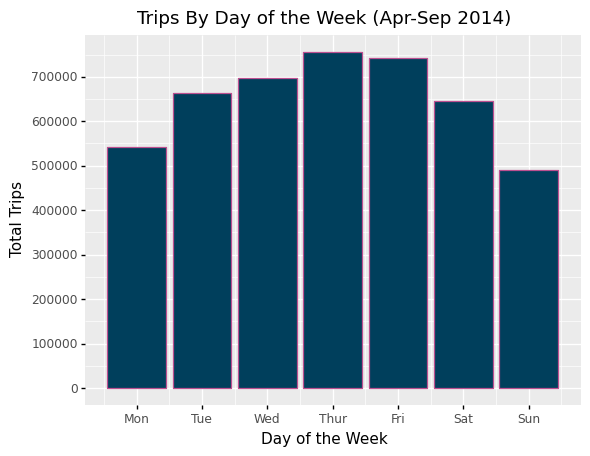

<ggplot: (-9223371902761043380)>

In [27]:
ggplot(week_day, aes('Day_of_Week', 'trip_count')) + \
geom_bar(stat='identity', fill='#003f5c', color='#bc5090') + \
labels.ggtitle('Trips By Day of the Week (Apr-Sep 2014)') + labels.xlab('Day of the Week') + labels.ylab('Total Trips') + \
scales.scale_x_continuous(breaks=range(0, 7), labels=week_day['Day_Name']) + \
scales.scale_y_continuous(breaks=range(0, 800000, 100000))

In [28]:
# Trips by month and day of week

week_month = data.groupby(by=['Month', 'Month_Name', 'Day_of_Week', 'Day_Name']).sum().reset_index()
week_month = week_month[['Month', 'Month_Name', 'Day_of_Week', 'Day_Name', 'trip_count']]
week_month

Month,Month_Name,Day_of_Week,Day_Name,trip_count


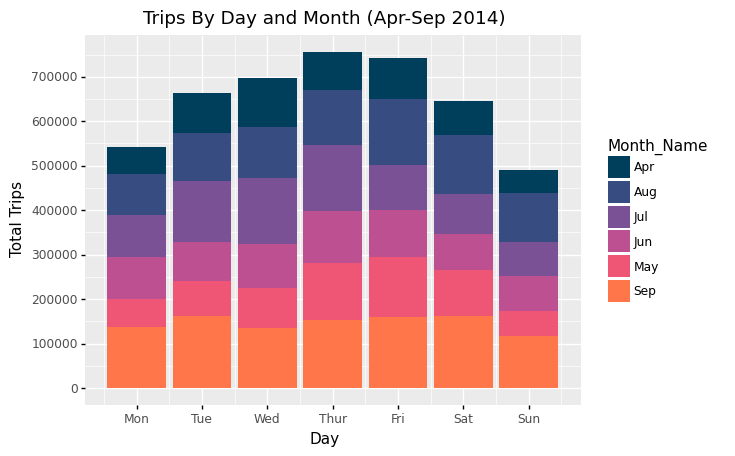

<ggplot: (-9223371902761038360)>

In [29]:
ggplot(week_month, aes('Day_of_Week', 'trip_count', fill='Month_Name')) + \
geom_bar(stat='identity') + \
labels.ggtitle('Trips By Day and Month (Apr-Sep 2014)') + labels.xlab('Day') + labels.ylab('Total Trips') + \
scales.scale_x_continuous(breaks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']) + \
scales.scale_y_continuous(breaks=range(0, 1500000, 100000)) + \
scales.scale_fill_manual(values=colors)

## Plot trips by month

In [30]:
month_data = data.groupby(by=['Month', 'Month_Name']).sum().reset_index()
month_data = month_data[['Month', 'Month_Name', 'trip_count']]
month_data

Month,Month_Name,trip_count


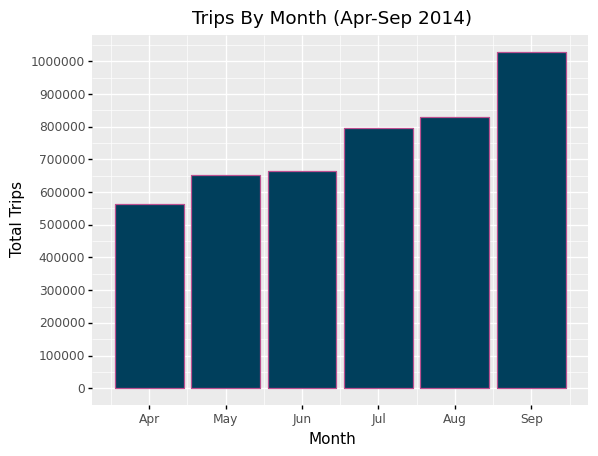

<ggplot: (-9223371902760913836)>

In [31]:
ggplot(month_data, aes('Month', 'trip_count')) + \
geom_bar(stat='identity', fill='#003f5c', color='#bc5090') + \
labels.ggtitle('Trips By Month (Apr-Sep 2014)') + labels.xlab('Month') + labels.ylab('Total Trips') + \
scales.scale_x_continuous(breaks=range(4, 10), labels=month_data['Month_Name']) + \
scales.scale_y_continuous(breaks=range(0, 1500000, 100000))

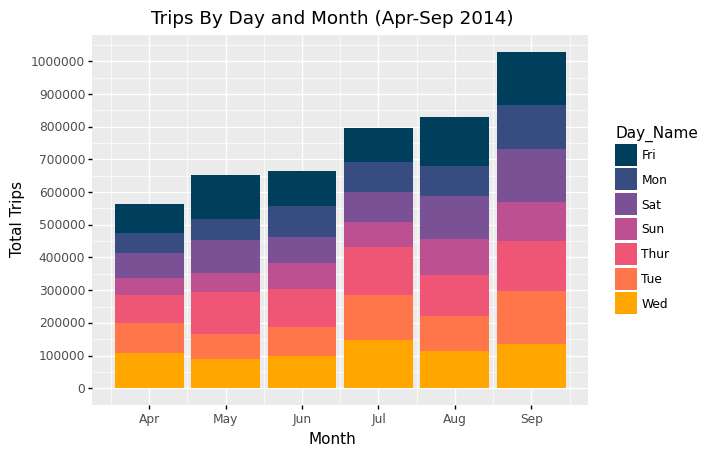

<ggplot: (-9223371902760917596)>

In [32]:
ggplot(week_month, aes('Month', 'trip_count', fill='Day_Name')) + \
geom_bar(stat='identity') + \
labels.ggtitle('Trips By Day and Month (Apr-Sep 2014)') + labels.xlab('Month') + labels.ylab('Total Trips') + \
scales.scale_x_continuous(breaks=range(4, 10), labels=['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']) + \
scales.scale_y_continuous(breaks=range(0, 1500000, 100000)) + \
scales.scale_fill_manual(values=colors)

## Plot trips by base

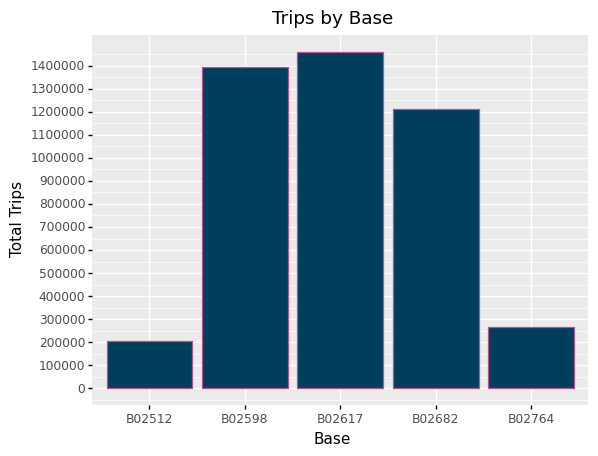

<ggplot: (-9223371902760254104)>

In [33]:
ggplot(data, aes('Base')) + geom_bar(fill='#003f5c', color='#bc5090') + \
scales.scale_y_continuous(breaks=range(0, 1500000, 100000)) + \
labels.ggtitle('Trips by Base') + labels.ylab('Total Trips')

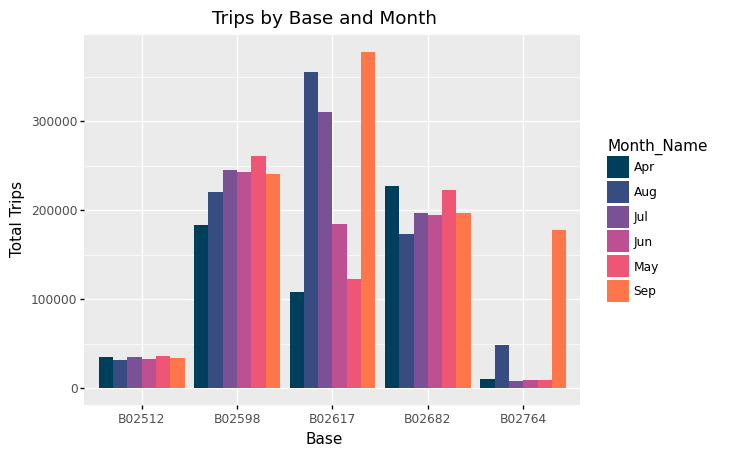

<ggplot: (-9223371902761041628)>

In [34]:
# dodge position places bars side-by-side

ggplot(data, aes('Base', fill='Month_Name')) + \
geom_bar(position='dodge') + \
scales.scale_y_continuous(breaks=range(0, 1500000, 100000)) + labels.ggtitle('Trips by Base and Month') + labels.ylab('Total Trips') + \
scales.scale_fill_manual(values=colors)

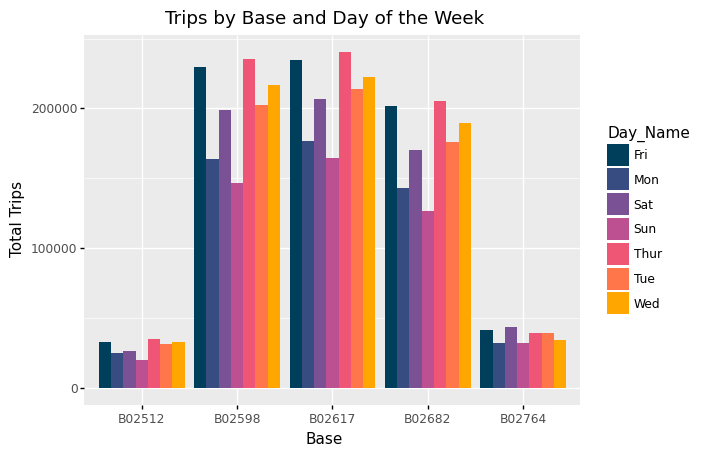

<ggplot: (-9223371902760095048)>

In [35]:
ggplot(data, aes('Base', fill='Day_Name')) + geom_bar(position='dodge') + \
scales.scale_y_continuous(breaks=range(0, 1500000, 100000)) + labels.ggtitle('Trips by Base and Day of the Week') + labels.ylab('Total Trips') + \
scales.scale_fill_manual(values=colors)

## Plot heatmaps

### Heatmap by day and hour

In [36]:
day_hour = data.groupby(by=['Day', 'hour']).sum().reset_index()
day_hour = day_hour[['Day', 'hour', 'trip_count']]
day_hour

Day,hour,trip_count


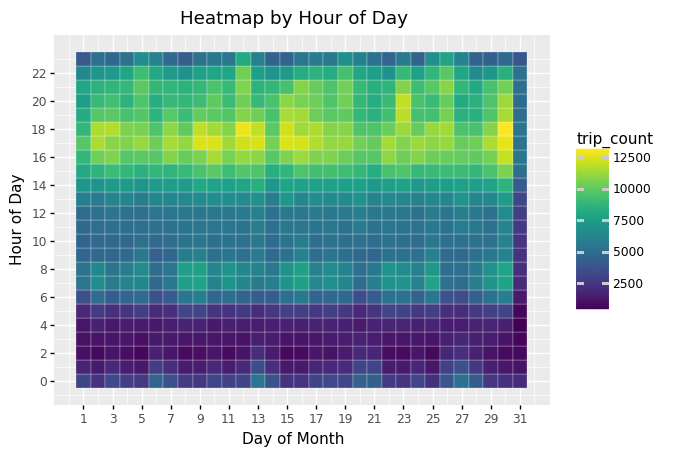

<ggplot: (-9223371902760095080)>

In [37]:
ggplot(day_hour, aes('Day', 'hour', fill='trip_count')) + \
geom_tile(color='white') + \
labels.ggtitle('Heatmap by Hour of Day') + labels.ylab('Hour of Day') + labels.xlab('Day of Month') + \
scales.scale_x_continuous(breaks=range(1, 32, 2)) + \
scales.scale_y_continuous(breaks=range(0, 24, 2))

### Heatmap by month and day

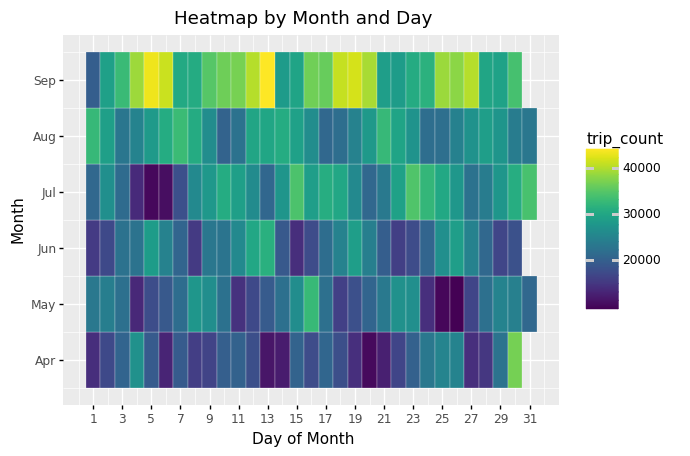

<ggplot: (-9223371902757848784)>

In [38]:
ggplot(day_month, aes('Day', 'Month', fill='trip_count')) + \
geom_tile(color='white') + \
labels.ggtitle('Heatmap by Month and Day') + labels.ylab('Month') + labels.xlab('Day of Month') + \
scales.scale_x_continuous(breaks=range(1, 32, 2)) + \
scales.scale_y_continuous(breaks=range(4, 10), labels=['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])

### Heatmap by month and day of the week

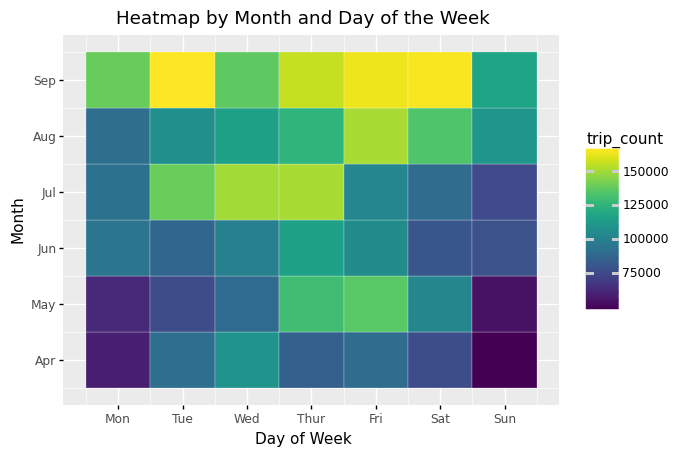

<ggplot: (-9223371902757856992)>

In [39]:
ggplot(week_month, aes('Day_of_Week', 'Month', fill='trip_count')) + \
geom_tile(color='white') + \
labels.ggtitle('Heatmap by Month and Day of the Week') + labels.ylab('Month') + labels.xlab('Day of Week') + \
scales.scale_x_continuous(breaks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']) + \
scales.scale_y_continuous(breaks=range(4, 10), labels=['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])